In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('cost_values2.csv', delimiter=";", index_col='Build#')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(95, 7)
['T_build_actual', 'Number of parts', 'Total  volume', 'Total support volume', 'Total surface area', 'max build height', 'number of layers']


In [3]:
data.head()

,T_build_actual,Number of parts,Total volume,Total support volume,Total surface area,max build height,number of layers
Build#,,,,,,,
1,763,20,86073.000,23671.000,11714.7450,23.369,467
2,185,12,4585.000,1153.000,3345.7405,21.000,420
3,1480,65,201225.367,31706.004,4512.4612,71.160,1423
4,953,35,117106.987,12860.414,4512.4612,69.539,2317
5,963,9,137014.784,41261.061,32392.0580,40.672,1355


In [4]:
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix

,T_build_actual,Number of parts,Total volume,Total support volume,Total surface area,max build height,number of layers
T_build_actual,1.000000,0.284079,0.994073,0.448042,0.232321,0.585727,0.573243
Number of parts,0.284079,1.000000,0.217239,0.062284,-0.258239,0.008542,0.018186
Total volume,0.994073,0.217239,1.000000,0.417138,0.224949,0.547838,0.535077
Total support volume,0.448042,0.062284,0.417138,1.000000,0.427789,0.594530,0.589456
Total surface area,0.232321,-0.258239,0.224949,0.427789,1.000000,0.652112,0.643343
max build height,0.585727,0.008542,0.547838,0.594530,0.652112,1.000000,0.994714
number of layers,0.573243,0.018186,0.535077,0.589456,0.643343,0.994714,1.000000


<Axes: >

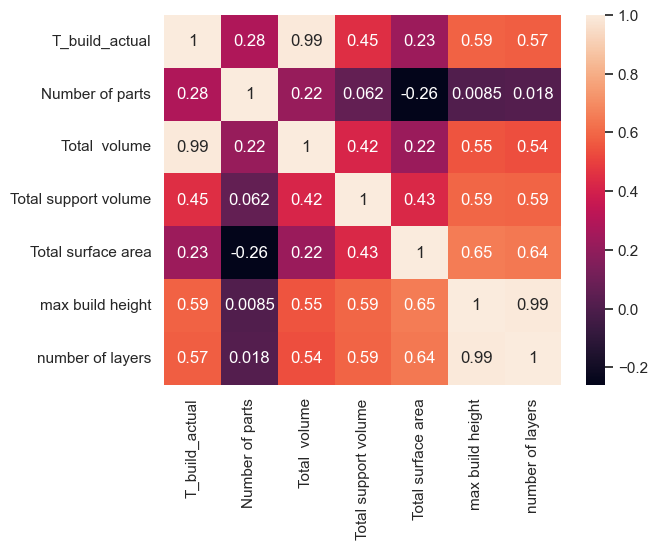

In [5]:

sns.heatmap(data.corr(),annot=True)

In [6]:
X = data.drop('T_build_actual', axis=1)
y = data['T_build_actual']
print(X, y)

        Number of parts  Total  volume  Total support volume  \
Build#                                                         
1                    20      86073.000             23671.000   
2                    12       4585.000              1153.000   
3                    65     201225.367             31706.004   
4                    35     117106.987             12860.414   
5                     9     137014.784             41261.061   
...                 ...            ...                   ...   
96                    3    1236996.000             28379.000   
97                    2     701792.000              2511.000   
98                   21    1325801.000            108977.000   
99                   23     866051.000            167919.000   
100                   4    1186915.000            160722.000   

        Total surface area  max build height  number of layers  
Build#                                                          
1               11714.7450           

In [7]:
# we initialize variables to store best model and its score
best_model = None
best_score = float('-inf')

# we iterate over different folds and fit models
for fold in range(5):
    # we create a linear regression model
    model = LinearRegression()

    # fitting the model using cross-validation
    score = cross_val_score(model, X, y, scoring='r2', cv=5)[fold]

    # we check if this model's score is better than the best score so far
    if score > best_score:
        best_score = score
        best_model = model.fit(X, y)

In [8]:
# Get the coefficients and intercept of the best model
coefficients = best_model.coef_
intercept = best_model.intercept_

print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [ 1.12388821e+01  5.58944008e-03  6.04987211e-04 -2.81620044e-04
  8.38924024e+00 -2.34679533e-01]
Intercept: -55.14539374334845


In [9]:
# Formulate the equation
equation = f'T_build_actual = {intercept}'
for i, coef in enumerate(coefficients):
    equation += f' + {coef:.4f} * {X.columns[i]}'

print('Equation:', equation)

Equation: T_build_actual = -55.14539374334845 + 11.2389 * Number of parts + 0.0056 * Total  volume + 0.0006 * Total support volume + -0.0003 * Total surface area + 8.3892 * max build height + -0.2347 * number of layers


In [10]:
# Make predictions using the best model
y_pred = best_model.predict(X)

# Calculate metrics
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

print('R-squared:', r2)
print('RMSE:', rmse)

R-squared: 0.9968443223217615
RMSE: 153.1838908142009


In [11]:
# Create DataFrame to compare true values, predicted values, and difference
results = pd.DataFrame({'True Value': y, 'Predicted': y_pred, 'Difference (min)':y-y_pred})
results['Difference (%)'] = ((results['True Value'] - results['Predicted']) / results['True Value']) * 100
#Sort results by max and min error
#results = results.sort_values(by = ['Difference (min)'], ascending = False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(results)

        True Value    Predicted  Difference (min)  Difference (%)
Build#                                                           
1              763   748.206482         14.793518        1.938862
2              185   182.712738          2.287262        1.236358
3             1480  2081.059360       -601.059360      -40.612119
4              953  1038.914451        -85.914451       -9.015158
5              963   850.897043        112.102957       11.641013
6              123   144.797678        -21.797678      -17.721689
7              632   723.376653        -91.376653      -14.458331
8             3094  3234.083722       -140.083722       -4.527593
9             1048  1307.718762       -259.718762      -24.782325
10            3421  3419.744100          1.255900        0.036712
11            1996  1915.644124         80.355876        4.025845
12            1553  1693.557958       -140.557958       -9.050738
13              30    -3.645009         33.645009      112.150031
14        

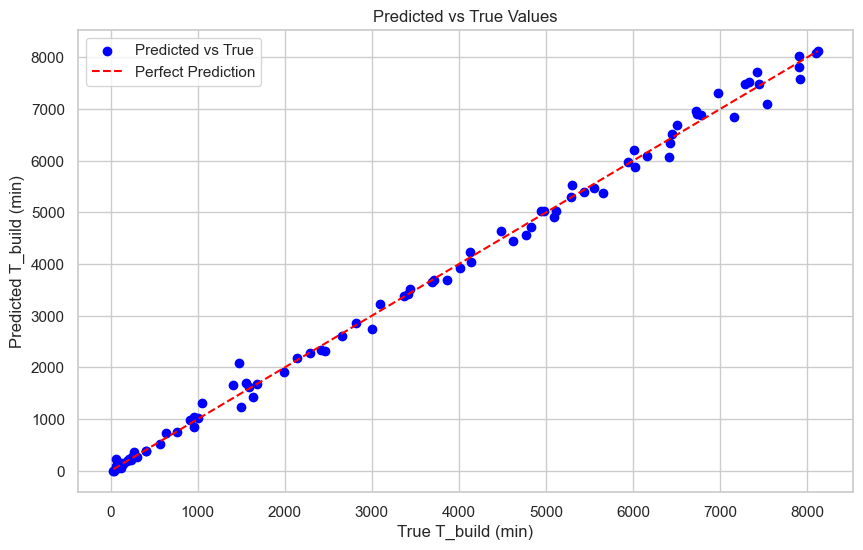

In [12]:
import matplotlib.pyplot as plt

# Plotting predicted vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Predicted vs True')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True T_build (min)')
plt.ylabel('Predicted T_build (min)')
plt.title('Predicted vs True Values')
plt.legend()
plt.show()

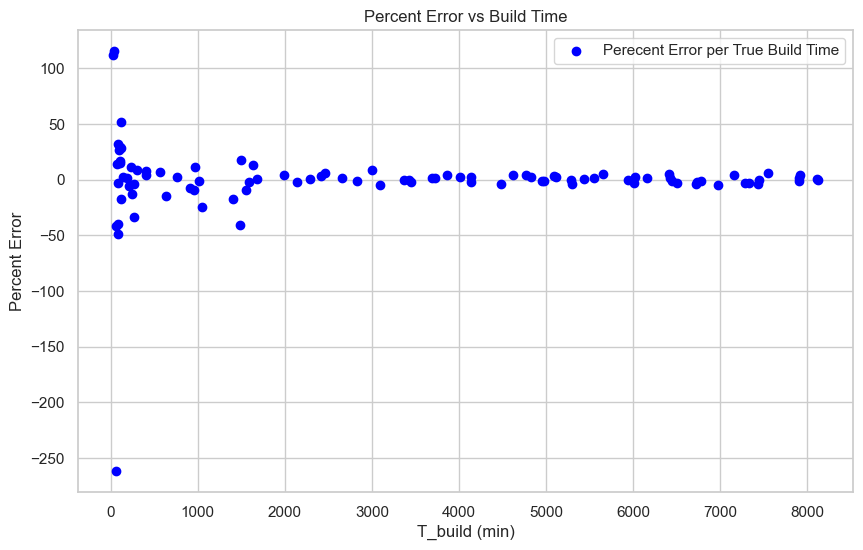

In [13]:
#Plotting percent error over build time true values. The goal is to see if there is a particular region swaying the RSME.

plt.figure(figsize=(10, 6))
plt.scatter(y, results['Difference (%)'], color='blue', label='Perecent Error per True Build Time')
plt.xlabel('T_build (min)')
plt.ylabel('Percent Error')
plt.title('Percent Error vs Build Time')
plt.legend()
plt.show()

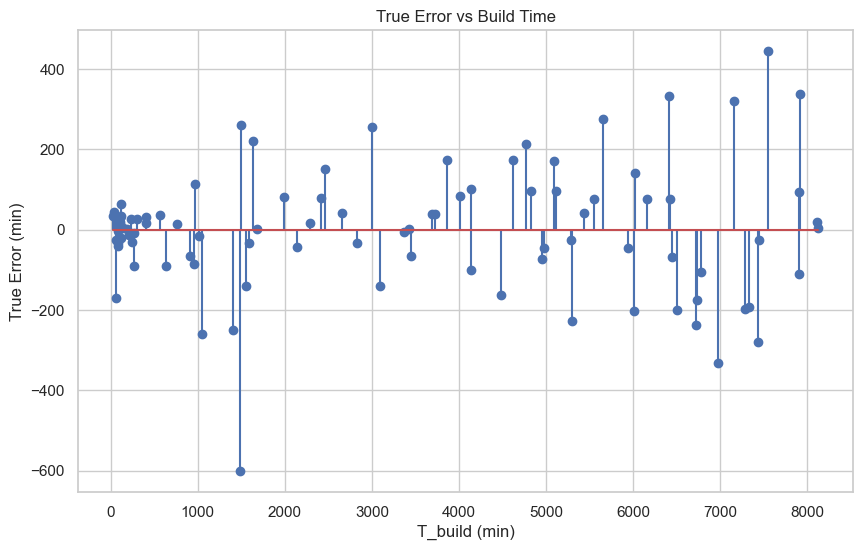

In [14]:
#Plotting actual error over build time true values. The goal is to see if there is a particular region swaying the RSME.

fig, ax = plt.subplots(figsize = (10, 6))
ax.stem(y, results['Difference (%)']*y/100)
#ax.stem(y, y-ypred)
plt.xlabel('T_build (min)')
plt.ylabel('True Error (min)')
plt.title('True Error vs Build Time')
plt.show()

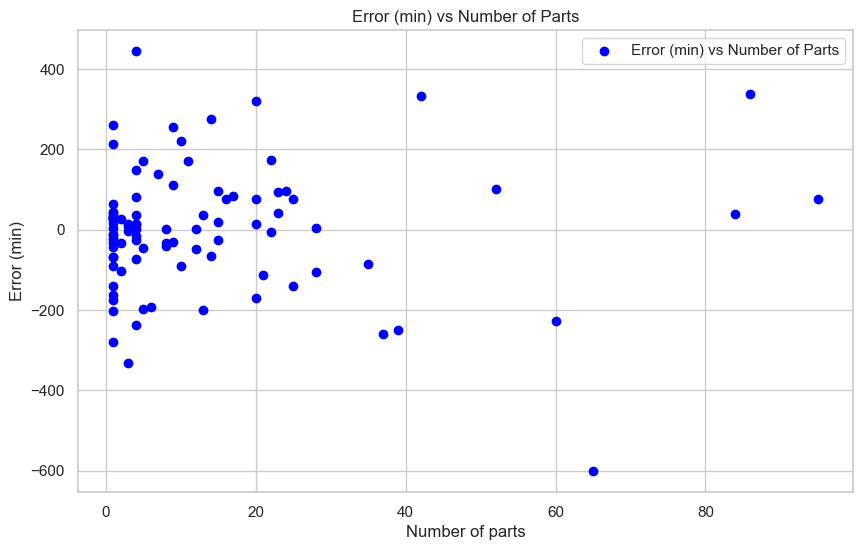

In [15]:
# Plotting error vs part number
plt.figure(figsize=(10, 6))
plt.scatter(data['Number of parts'], results['Difference (min)'], color='blue', label='Error (min) vs Number of Parts')
#plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Number of parts')
plt.ylabel('Error (min)')
plt.title('Error (min) vs Number of Parts')
plt.legend()
plt.show()